# CH04 - 4.5.2.3

In [1]:
from Chapter4.FrequencyAbstraction import FourierTransformation
from Chapter4.TemporalAbstraction import NumericalAbstraction
from util.VisualizeDataset import VisualizeDataset
import os
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
plt.rcParams["figure.figsize"] = [15,10]

In [2]:
rawdatapth = "data/raw/"
outputpth = "data/intermediate/"

if not os.path.exists(outputpth):
    print("Empty path, so creating..." + outputpth + "...done!")
    os.makedirs(outputpth)

In [3]:
dataset = pd.read_csv(rawdatapth + "Accelerometer_index.csv", index_col=0)
dataset.index = pd.to_datetime(dataset.index)
dataset

,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2)
2016-02-08 18:28:25.656222,2.217249,3.143571,8.867203
2016-02-08 18:28:25.906222,2.186143,3.160321,8.862417
2016-02-08 18:28:26.156222,2.135893,3.191427,8.850452
2016-02-08 18:28:26.406222,2.080858,3.189034,8.860024
2016-02-08 18:28:26.656222,2.033002,3.210570,8.869596
...,...,...,...
2016-02-08 20:41:03.906222,6.713363,-11.927323,1.919642
2016-02-08 20:41:04.156222,5.724529,-11.786147,2.235495
2016-02-08 20:41:04.406222,4.781458,-11.565708,2.618645
2016-02-08 20:41:04.656222,3.948157,-11.314462,2.953939


In [4]:
DataViz = VisualizeDataset()
NumAbs = NumericalAbstraction()
FreqAbs = FourierTransformation()

In [5]:
Nsec = (dataset.index[1] - dataset.index[0]).microseconds/1000
window_sizes = [int(float(5000)/Nsec), 
                int(float(0.5*60000)/Nsec), 
                int(float(5*60000)/Nsec)]
Nsec

250.0

In [6]:
col = "Acceleration x (m/s^2)"
fs = float(1000)/Nsec
ws = int(float(10000)/Nsec)
datafreq = FreqAbs.abstract_frequency(copy.deepcopy(dataset), [col], ws, fs)
datafreq

,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Acceleration x (m/s^2)_max_freq,Acceleration x (m/s^2)_freq_weighted,Acceleration x (m/s^2)_pse,Acceleration x (m/s^2)_freq_0.0_Hz_ws_40,Acceleration x (m/s^2)_freq_0.1_Hz_ws_40,Acceleration x (m/s^2)_freq_0.2_Hz_ws_40,Acceleration x (m/s^2)_freq_0.3_Hz_ws_40,...,Acceleration x (m/s^2)_freq_1.1_Hz_ws_40,Acceleration x (m/s^2)_freq_1.2_Hz_ws_40,Acceleration x (m/s^2)_freq_1.3_Hz_ws_40,Acceleration x (m/s^2)_freq_1.4_Hz_ws_40,Acceleration x (m/s^2)_freq_1.5_Hz_ws_40,Acceleration x (m/s^2)_freq_1.6_Hz_ws_40,Acceleration x (m/s^2)_freq_1.7_Hz_ws_40,Acceleration x (m/s^2)_freq_1.8_Hz_ws_40,Acceleration x (m/s^2)_freq_1.9_Hz_ws_40,Acceleration x (m/s^2)_freq_2.0_Hz_ws_40
2016-02-08 18:28:25.656222,2.217249,3.143571,8.867203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-08 18:28:25.906222,2.186143,3.160321,8.862417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-08 18:28:26.156222,2.135893,3.191427,8.850452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-08 18:28:26.406222,2.080858,3.189034,8.860024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-08 18:28:26.656222,2.033002,3.210570,8.869596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-08 20:41:03.906222,6.713363,-11.927323,1.919642,0.092935,0.082515,0.0,698.568119,-89.780758,-17.850157,-4.977898,...,3.454275,3.445913,3.445677,3.488678,3.479175,3.517406,3.631466,3.692106,3.687379,3.798166
2016-02-08 20:41:04.156222,5.724529,-11.786147,2.235495,0.097650,0.109666,0.0,690.411286,-91.144614,-16.868820,-0.810538,...,4.123203,4.180651,4.354751,4.398704,4.435002,4.522309,4.445566,4.417316,4.462744,4.365041
2016-02-08 20:41:04.406222,4.781458,-11.565708,2.618645,0.103032,0.137111,0.0,680.605200,-91.906448,-15.507442,2.894101,...,4.881427,5.093761,5.159733,5.216440,5.300458,5.226891,5.311833,5.365753,5.326889,5.431514
2016-02-08 20:41:04.656222,3.948157,-11.314462,2.953939,0.108184,0.159805,0.0,669.256939,-91.923250,-13.713963,5.633891,...,5.864703,5.933010,5.872183,5.904954,5.868312,5.973858,5.983360,5.960812,6.019557,5.924854


ValueError: min() arg is an empty sequence

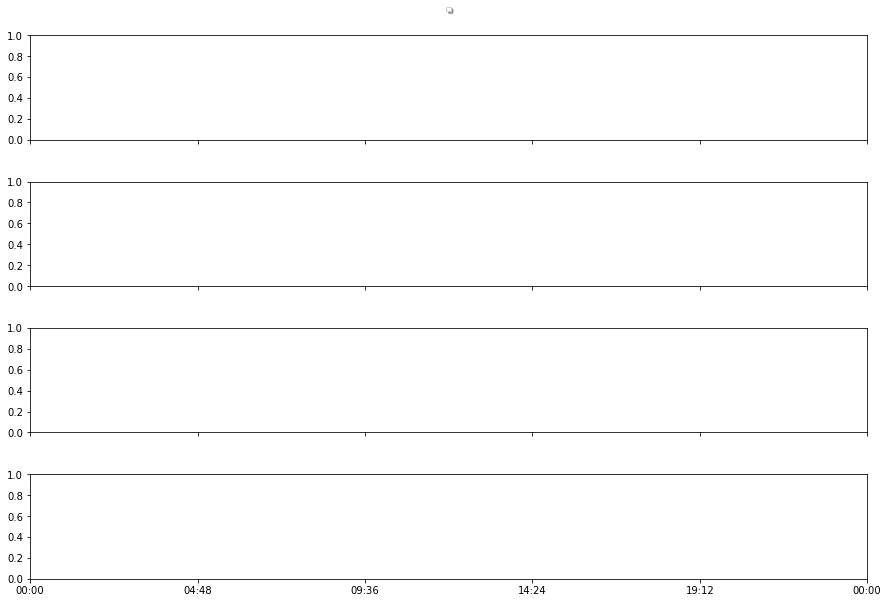

In [7]:
cols = ['acc_phone_x_max_freq', 'acc_phone_x_freq_weighted', 'acc_phone_x_pse', 'label']
DataViz.plot_dataset(datafreq, cols, ['like', 'like', 'like', 'like'], ['line', 'line', 'line','points'])

In [ ]:
datawalk = datafreq[datafreq["labelWalking"] != 0][:len(datafreq[datafreq['labelRunning'] != 0])]
DataViz.plot_dataset(datawalk, cols, ['like', 'like', 'like', 'like'], ['line', 'line', 'line','points'])